In [1]:
import numpy as np
from seisLM.data_pipeline.foreshock_aftershock_dataset import (
  create_foreshock_aftershock_datasets
)
from seisLM.data_pipeline.foreshock_aftershock_dataloaders import (
  prepare_foreshock_aftershock_dataloaders)
import pandas as pd
import matplotlib.pyplot as plt
from seisLM.utils.project_path import gitdir
NUM_CLASSES = 4

/home/liu0003/miniconda3/envs/seisbench/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import json
import ml_collections
import torch
from seisLM.model.task_specific.foreshock_aftershock_models import (
  Conv1DShockClassifierLit, Wav2vec2ShockClassifierLit)


def get_seisLM_config():
  config_path = gitdir() + '/seisLM/configs/foreshock_aftershock/seisLM_shock_classifier.json'
  with open(config_path, "r", encoding="utf-8") as f:
    config = json.load(f)
  config = ml_collections.ConfigDict(config)
  config.model_args.num_classes = NUM_CLASSES
  return config

config = get_seisLM_config()

model = Wav2vec2ShockClassifierLit(
  model_config=config.model_args,
  training_config=config.trainer_args,
  ).model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = Conv1DShockClassifierLit.load_from_checkpoint(
#   gitdir() + "/results/models/foreshock_aftershock_run/num_classes_4_seed_42_model_Conv1DShockClassifier_time_2024-08-07-14h-54m-40s/checkpoints/epoch=37-step=6042.ckpt"
# ).model

In [4]:
from seisLM.model.foundation import pretrained_models


pretrained_model = pretrained_models.LitMultiDimWav2Vec2.load_from_checkpoint(
    model.config.pretrained_ckpt_path
).model



In [3]:
loaders = prepare_foreshock_aftershock_dataloaders(
  num_classes=model.config.num_classes,
  **config.data_args
)

Seed set to 42
Seed set to 42


<Figure size 800x800 with 0 Axes>

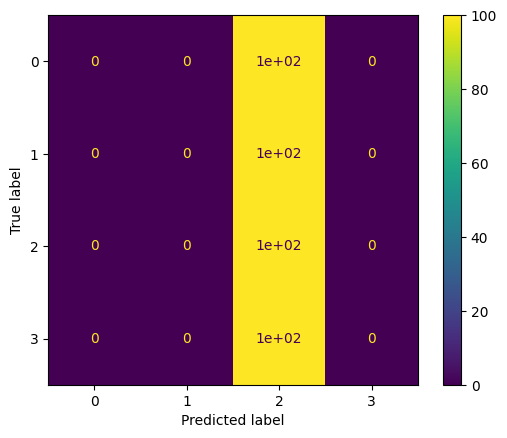

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


all_gt_class = []
all_pred_class = []

model = model.to(device)
model.eval()

for X, y in loaders['test']:
  with torch.no_grad():
    logits = model(X.to(device)).cpu().numpy()
    pred_class = np.argmax(logits, axis=1)

  all_gt_class.append(y)
  all_pred_class.append(pred_class)

all_gt_class = np.concatenate(all_gt_class)
all_pred_class = np.concatenate(all_pred_class)


cm = confusion_matrix(all_gt_class, all_pred_class)
cm_percentage = 100 * cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage)
disp.plot()

In [5]:
model.

array([[ 3.28035069e+00, -1.42542429e+01,  1.00580482e+01,
         1.57505274e-02],
       [ 2.59411120e+00, -1.72822762e+01,  9.40774727e+00,
        -3.68718958e+00],
       [ 3.72995210e+00, -1.48690119e+01,  8.77424431e+00,
        -4.86181855e-01],
       [ 1.45319927e+00, -1.65253563e+01,  9.09735489e+00,
        -3.65589571e+00],
       [ 3.70648193e+00, -1.42472811e+01,  1.04909477e+01,
        -1.02774632e+00],
       [ 4.33689785e+00, -1.60680275e+01,  9.73939705e+00,
        -1.44860494e+00],
       [ 5.47450972e+00, -1.58253298e+01,  9.46057701e+00,
        -1.69530499e+00],
       [ 4.30092621e+00, -1.64415836e+01,  1.02800064e+01,
        -2.33097744e+00],
       [ 2.94102645e+00, -1.65654411e+01,  9.11706924e+00,
        -3.72874832e+00],
       [ 4.17666626e+00, -1.64596100e+01,  1.05727310e+01,
        -3.23469400e+00],
       [ 2.51015878e+00, -1.36565256e+01,  9.65303230e+00,
        -5.58935404e-02],
       [ 9.69927609e-01, -1.88815269e+01,  8.31409454e+00,
      